In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
pub_df = pd.read_csv("reports_data.csv")

In [9]:
pub_df.shape

(641, 5)

In [10]:
pub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 5 columns):
url              641 non-null object
total_clicks     641 non-null int64
unique_clicks    641 non-null int64
digest_num       641 non-null int64
publisher        641 non-null object
dtypes: int64(3), object(2)
memory usage: 25.2+ KB


In [11]:
pub_df.head()

,url,total_clicks,unique_clicks,digest_num,publisher
0,https://foreignpolicy.com/2019/06/12/britain-f...,82,72,6,foreignpolicy.com
1,https://foreignpolicy.com/2019/06/12/britain-f...,82,72,6,foreignpolicy.com
2,https://www.nytimes.com/2019/06/13/world/asia/...,18,18,6,nytimes.com
3,https://www.nytimes.com/2019/06/13/world/asia/...,18,18,6,nytimes.com
4,https://foreignpolicy.com/2019/06/12/hong-kong...,12,11,6,foreignpolicy.com


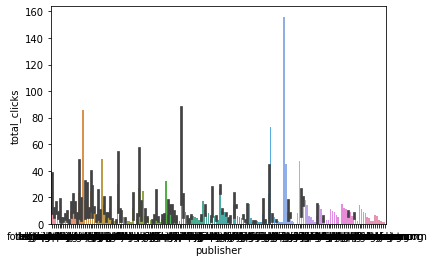

In [12]:
sns.barplot("publisher", "total_clicks", data=pub_df)

In [13]:
pub_df.publisher.value_counts()

nytimes.com                   47
ashingtonpost.com             40
bloomberg.com                 30
theguardian.com               29
forbes.com                    21
                              ..
anl.gov                        1
datadrivenperspectives.com     1
fivethirtyeight.com            1
insidestory.org.au             1
crainsnewyork.com              1
Name: publisher, Length: 173, dtype: int64

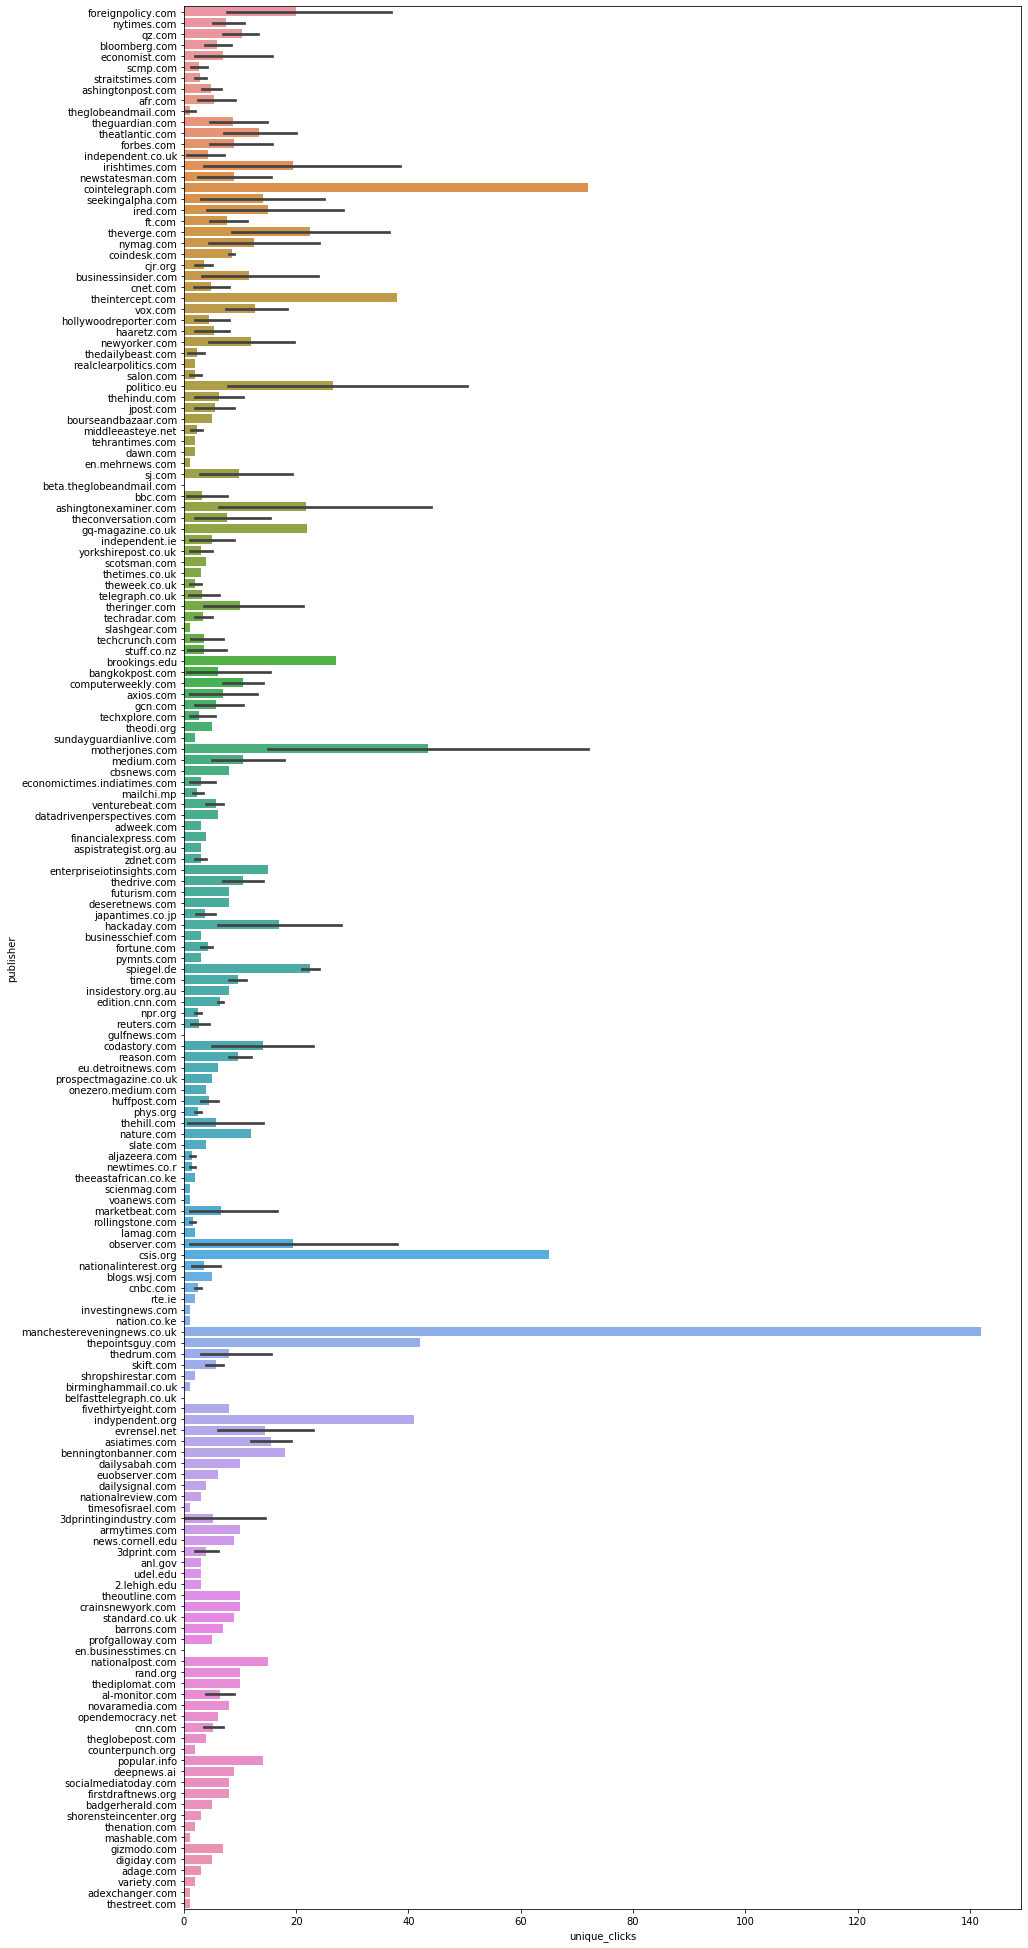

In [14]:
plt.figure(figsize=(15, 35))
sns.barplot("unique_clicks", "publisher", data=pub_df, orient='h')

In [15]:
pub_grp_sr = pub_df.groupby(["publisher"])

In [16]:
pub_grp_df = pd.DataFrame(pub_grp_sr['unique_clicks'].sum().sort_values(ascending=False))

In [17]:
pub_grp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173 entries, nytimes.com to gulfnews.com
Data columns (total 1 columns):
unique_clicks    173 non-null int64
dtypes: int64(1)
memory usage: 2.7+ KB


In [18]:
pub_grp_df.describe()

,unique_clicks
count,173.000000
mean,30.260116
std,53.177046
min,0.000000
25%,4.000000
50%,10.000000
75%,29.000000
max,356.000000


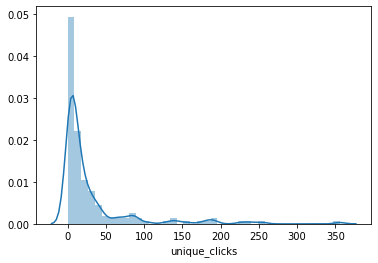

In [19]:
sns.distplot(pub_grp_df['unique_clicks'])

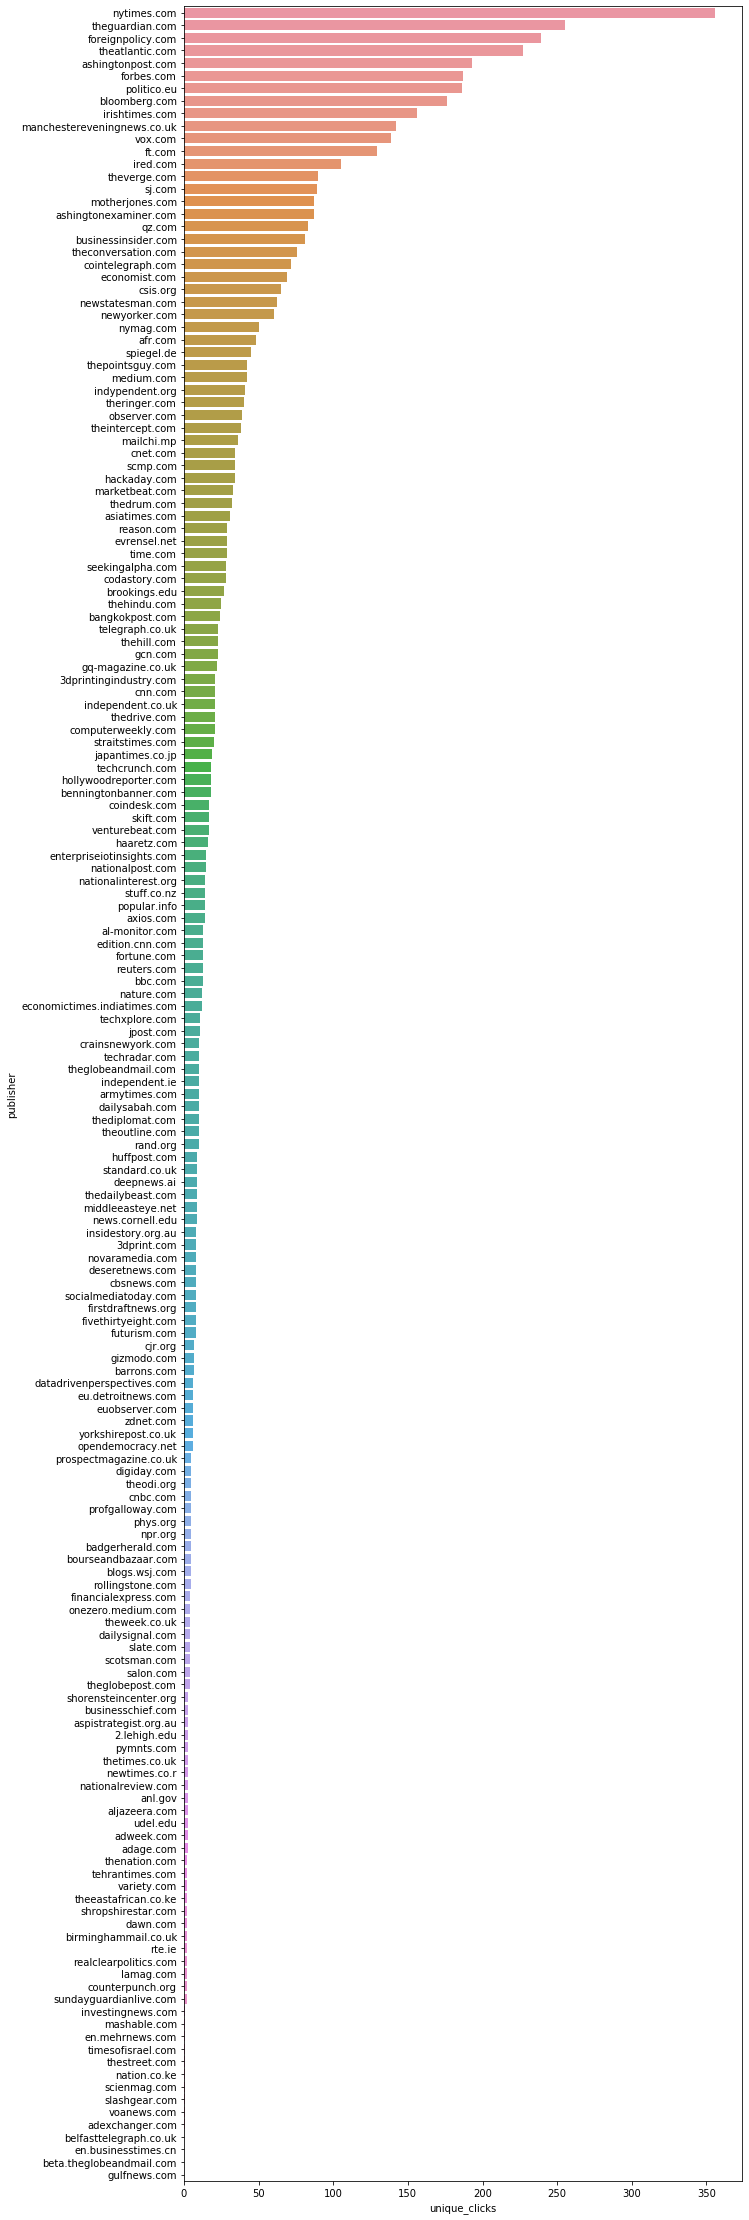

In [20]:
plt.figure(figsize=(10, 40))
sns.barplot("unique_clicks", pub_grp_df.index, data=pub_grp_df, orient='h')

In [21]:
pub_grp_df.loc[pub_grp_df['unique_clicks'] > 10]

,unique_clicks
publisher,
nytimes.com,356
theguardian.com,255
foreignpolicy.com,239
theatlantic.com,227
ashingtonpost.com,193
...,...
bbc.com,13
nature.com,12
economictimes.indiatimes.com,12


In [22]:
pub_grp_mean_df = pd.DataFrame(pub_grp_sr['unique_clicks'].mean().sort_values(ascending=False))

In [23]:
pub_grp_mean_df.head()

,unique_clicks
publisher,
manchestereveningnews.co.uk,142.0
cointelegraph.com,72.0
csis.org,65.0
motherjones.com,43.5
thepointsguy.com,42.0


In [24]:
pub_grp_mean_df.columns = ['uniq_moy']
pub_grp_mean_df.head()

,uniq_moy
publisher,
manchestereveningnews.co.uk,142.0
cointelegraph.com,72.0
csis.org,65.0
motherjones.com,43.5
thepointsguy.com,42.0


In [25]:
pub_grp_sum_df = pub_grp_df
pub_grp_sum_df.columns = ['uniq_tt']
pub_grp_sum_df.head()

,uniq_tt
publisher,
nytimes.com,356
theguardian.com,255
foreignpolicy.com,239
theatlantic.com,227
ashingtonpost.com,193


In [26]:
pub_grp_merge_df = pub_grp_sum_df.join(pub_grp_mean_df)

In [27]:
pub_grp_merge_df.uniq_moy = pub_grp_merge_df.uniq_moy.round(2)

In [28]:
pub_grp_merge_df.head(10)

,uniq_tt,uniq_moy
publisher,,
nytimes.com,356,7.57
theguardian.com,255,8.79
foreignpolicy.com,239,19.92
theatlantic.com,227,13.35
ashingtonpost.com,193,4.82
forbes.com,187,8.90
politico.eu,186,26.57
bloomberg.com,176,5.87
irishtimes.com,156,19.50


In [29]:
pub_grp_merge_df_small50 = pub_grp_merge_df.loc[pub_grp_merge_df['uniq_tt'] >= 50]

In [30]:
pub_grp_merge_df_small50

,uniq_tt,uniq_moy
publisher,,
nytimes.com,356,7.57
theguardian.com,255,8.79
foreignpolicy.com,239,19.92
theatlantic.com,227,13.35
ashingtonpost.com,193,4.82
forbes.com,187,8.90
politico.eu,186,26.57
bloomberg.com,176,5.87
irishtimes.com,156,19.50


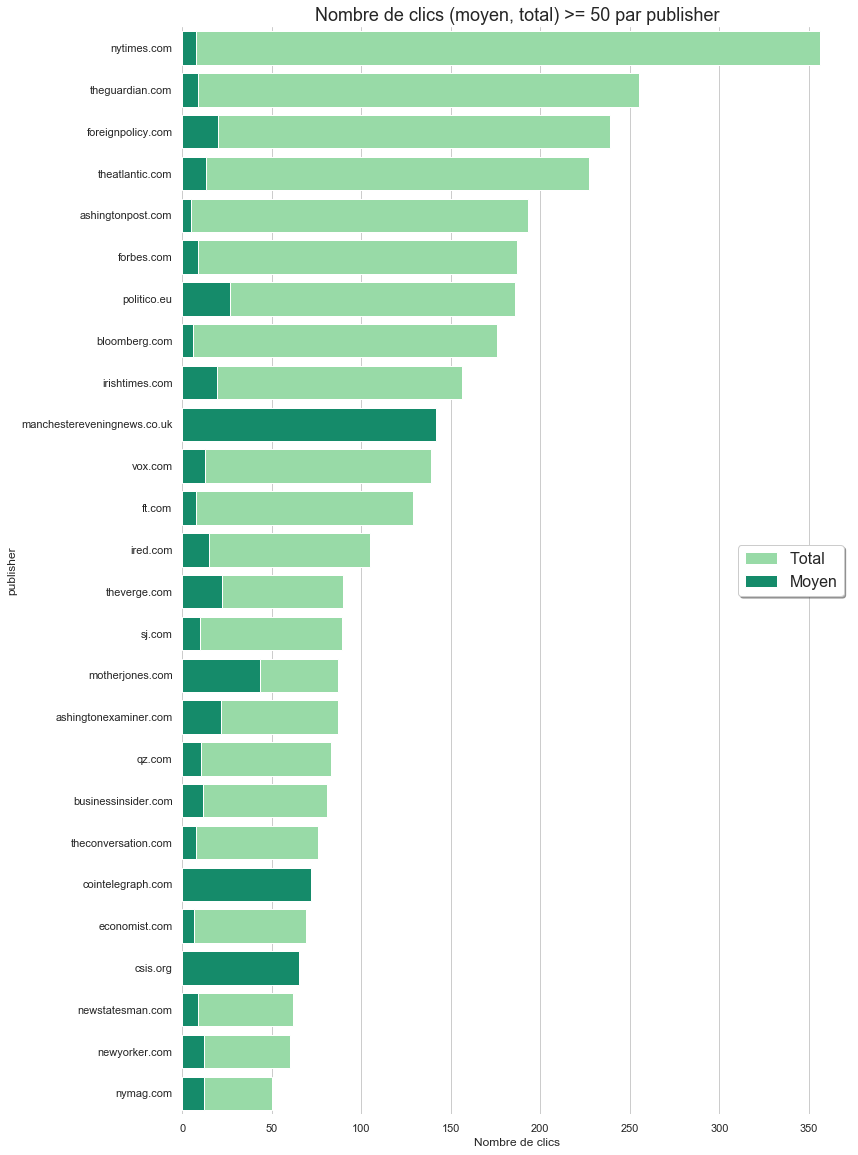

In [31]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 20))

# Plot the total clicks
sns.set_color_codes("pastel")
sns.barplot(x="uniq_tt", y=pub_grp_merge_df_small50.index, data=pub_grp_merge_df_small50,
            label="Total", color="g")

# Plot the mean clicks
sns.set_color_codes("colorblind")
sns.barplot(x="uniq_moy", y=pub_grp_merge_df_small50.index, data=pub_grp_merge_df_small50,
            label="Moyen", color="g")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="center right", frameon=True, fontsize=16, shadow=2)
ax.set_xlabel("Nombre de clics")
sns.despine(left=True, bottom=True)
plt.title("Nombre de clics (moyen, total) >= 50 par publisher", fontdict={'fontsize': 18})

plt.show()

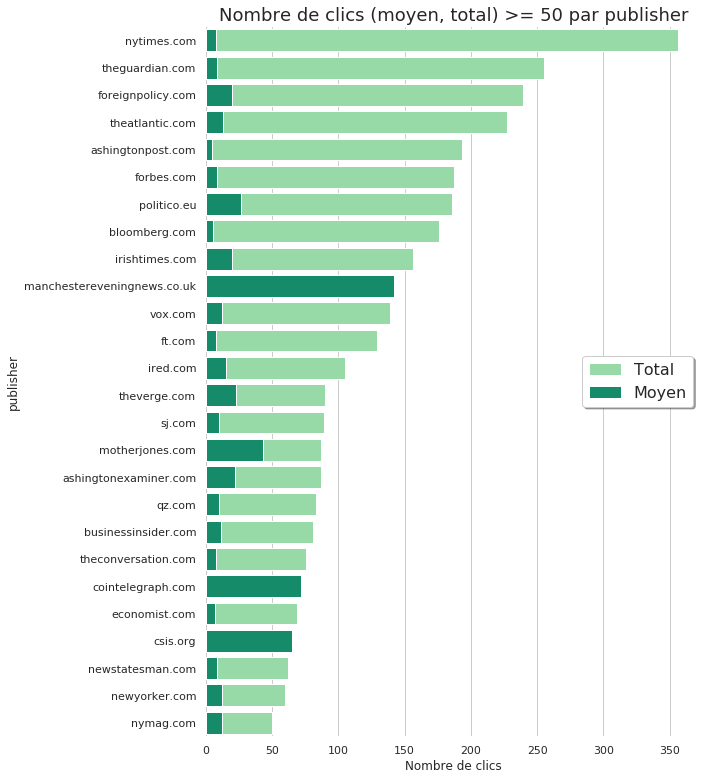

In [30]:
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 11))

# Plot the total clicks
sns.set_color_codes("pastel")
sns.barplot(x="uniq_tt", y=pub_grp_merge_df_small50.index, data=pub_grp_merge_df_small50,
            label="Total", color="g")

# Plot the mean clicks
sns.set_color_codes("colorblind")
sns.barplot(x="uniq_moy", y=pub_grp_merge_df_small50.index, data=pub_grp_merge_df_small50,
            label="Moyen", color="g")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="center right", frameon=True, fontsize=16, shadow=2)
ax.set_xlabel("Nombre de clics")
sns.despine(left=True, bottom=True)
plt.title("Nombre de clics (moyen, total) >= 50 par publisher", fontdict={'fontsize': 18})

plt.tight_layout()

plt.savefig("nb_clics_publishers.png", dpi=200)

plt.show()